In [1]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# get .csv data

data = pd.read_csv('data\zoo3.csv')

<>:3: SyntaxWarning: invalid escape sequence '\z'
<>:3: SyntaxWarning: invalid escape sequence '\z'
C:\Users\vitor\AppData\Local\Temp\ipykernel_7744\398892810.py:3: SyntaxWarning: invalid escape sequence '\z'
  data = pd.read_csv('data\zoo3.csv')


In [ ]:
# config 
numEpocas = 100000     # Número de épocas.
q = 100              # Número de padrões.
taxaDeAprendizado = 0.01  # Taxa de aprendizado
neuroniosEntrada = 17     # Número de neurônios na camada de entrada
neuroniosCamada2 = 15     # Número de neurônios na primeira camada escondida
neuroniosCamada3 = 10      # Número de neurônios na segunda camada escondida
neuroniosCamada4 = 5      # Número de neurônios na segunda camada escondida
NeuroniosSaida = 1        # Número de neurônios na camada de saída

# Carrega os dados de treinamento
nome = np.array(data['animal_name'])
pelo = np.array(data['hair'])
penas = np.array(data['feathers'])
ovos = np.array(data['eggs'])
leite = np.array(data['milk'])
ossosLeves = np.array(data['airborne'])
aquatico = np.array(data['aquatic'])
predador = np.array(data['predator'])
dentes = np.array(data['toothed'])
colunaVertebral = np.array(data['backbone'])
respira = np.array(data['breathes'])
venenoso = np.array(data['venomous'])
barbatanas = np.array(data['fins'])
pernas = np.array(data['legs'])
rabo = np.array(data['tail'])
domestico = np.array(data['domestic'])
catsize = np.array(data['catsize'])
classe = np.array(data['class_type'])

#classificação
d = np.array(data['class_type'], dtype=float)



In [4]:
# Inicia aleatoriamente as matrizes de pesos.
# Inicializando com m, N e L nos dá a liberdade de diferentes arquiteturas (só alterando as linhas 17,18 e 19)
# Inicia aleatoriamente as matrizes de pesos.
W1 = np.random.random((neuroniosCamada2, neuroniosEntrada + 1)) #dimensões da Matriz de entrada
W2 = np.random.random((neuroniosCamada3, neuroniosCamada2 + 1)) #dimensões da Matriz de saída
W3 = np.random.random((neuroniosCamada4, neuroniosCamada3 + 1)) #dimensões da Matriz de saída
W4 = np.random.random((NeuroniosSaida, neuroniosCamada4 + 1))   #dimensões da Matriz de saída

# Array para amazernar os erros.
E = np.zeros(q)
Etm = np.zeros(numEpocas) #Etm = Erro total médio ==> serve para acompanharmos a evolução do treinamento da rede

# bias
bias = 1

# Entrada do Perceptron.
X = np.vstack((pelo, penas, ovos, 
               leite, ossosLeves, aquatico, 
               predador, dentes, colunaVertebral, 
               respira, venenoso, barbatanas, pernas, 
               rabo, domestico, catsize, classe))  

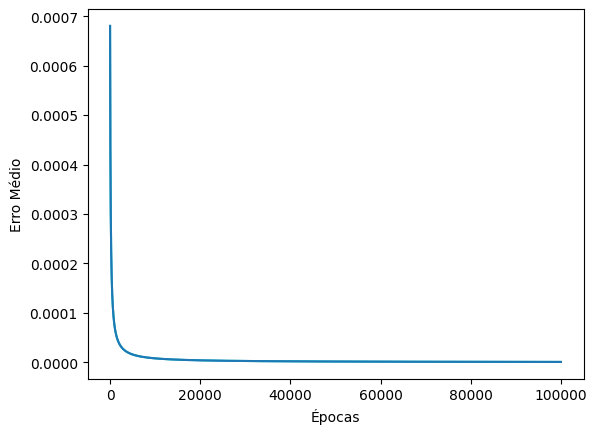

In [5]:
# ===============================================================
# TREINAMENTO.
# ===============================================================

for i in range(numEpocas):
    for j in range(q):
        # Insere o bias no vetor de entrada
        Xb = np.hstack((bias, X[:, j]))

        # Saída da primeira camada escondida
        o1 = np.tanh(W1.dot(Xb))
        o1b = np.insert(o1, 0, bias)

        # Saída da segunda camada escondida
        o2 = np.tanh(W2.dot(o1b))
        o2b = np.insert(o2, 0, bias)

        # Saída da terceira camada escondida
        o3 = np.tanh(W3.dot(o2b))
        o3b = np.insert(o3, 0, bias)

        # Saída da camada de saída
        Y = np.tanh(W4.dot(o3b))

        # Erro
        e = d[j] - Y

        # Erro Total
        E[j] = (e.transpose().dot(e)) / 2

        # Retropropagação do erro
        delta4 = np.diag(e).dot((1 - Y * Y))
        vdelta4 = (W4.transpose()).dot(delta4)
        delta3 = np.diag(1 - o3b * o3b).dot(vdelta4)
        vdelta3 = (W3.transpose()).dot(delta3[1:])
        delta2 = np.diag(1 - o2b[1:] * o2b[1:]).dot(vdelta3[1:])
        vdelta2 = (W2.transpose()).dot(delta2)
        delta1 = np.diag(1 - o1b[1:] * o1b[1:]).dot(vdelta2[1:])

        # Atualização dos pesos
        W1 = W1 + taxaDeAprendizado * (np.outer(delta1, Xb))
        W2 = W2 + taxaDeAprendizado * (np.outer(delta2, o1b))
        W3 = W3 + taxaDeAprendizado * (np.outer(delta3[1:], o2b))
        W4 = W4 + taxaDeAprendizado * (np.outer(delta4, o3b))

    # Calculo da média dos erros
    Etm[i] = E.mean()

plt.xlabel("Épocas")
plt.ylabel("Erro Médio")
plt.plot(Etm, color='c')
plt.plot(Etm)
plt.show()

In [6]:
# ===============================================================
# TESTE DA REDE.
# ===============================================================

Error_Test = np.zeros(q)

for i in range(q):
    # Insere o bias no vetor de entrada.
    Xb = np.hstack((bias, X[:,i]))

    # Saída da primeira camada escondida
    o1 = np.tanh(W1.dot(Xb))
    o1b = np.insert(o1, 0, bias)

    # Saída da segunda camada escondida
    o2 = np.tanh(W2.dot(o1b))
    o2b = np.insert(o2, 0, bias)

    # Saída da terceira camada escondida
    o3 = np.tanh(W3.dot(o2b))
    o3b = np.insert(o3, 0, bias)

    # Saída da camada de saída
    Y = np.tanh(W4.dot(o3b))

    # Certifique-se de que Y seja um valor escalar
    if Y.size == 1:
        Y = Y.item()
    else:
        Y = Y[0]

    Error_Test[i] = d[i] - Y

    # Imprimir valores para depuração
    print(f"Entrada: {X[:,i]}")
    print(f"Saída esperada: {d[i]}")
    print(f"Saída da rede: {Y}")
    print(f"Erro: {Error_Test[i]}")
    print("-----")

print(Error_Test)

# Verificação ajustada para considerar o erro pequeno
tolerance = 0.01
correct_predictions = np.abs(Error_Test) < tolerance
print("Previsões corretas:", correct_predictions)
print("Número de previsões corretas:", np.sum(correct_predictions))

Entrada: [1 0 0 1 0 0 0 1 1 1 0 0 4 0 0 0 1]
Saída esperada: 1.0
Saída da rede: 0.9987331784694078
Erro: 0.0012668215305922104
-----
Entrada: [1 0 0 1 0 1 1 1 1 1 0 1 4 1 0 0 1]
Saída esperada: 1.0
Saída da rede: 0.998733178469414
Erro: 0.0012668215305859931
-----
Entrada: [0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1]
Saída esperada: 1.0
Saída da rede: 0.9987331784693975
Erro: 0.0012668215306025354
-----
Entrada: [1 0 0 1 0 0 0 1 1 1 0 0 4 1 0 0 1]
Saída esperada: 1.0
Saída da rede: 0.9987331784694101
Erro: 0.001266821530589879
-----
Entrada: [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
Saída esperada: 1.0
Saída da rede: 0.9987331784694139
Erro: 0.0012668215305861041
-----
Entrada: [1 0 0 1 0 0 1 1 1 1 0 0 4 1 1 0 1]
Saída esperada: 1.0
Saída da rede: 0.9987331784694136
Erro: 0.0012668215305864372
-----
Entrada: [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
Saída esperada: 1.0
Saída da rede: 0.9987331784694139
Erro: 0.0012668215305861041
-----
Entrada: [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 0 1]
Saída esperada: 1.0
Saída 